Analyzing Hospital Readmission Rates

Descriptive Analysis Summary:
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%

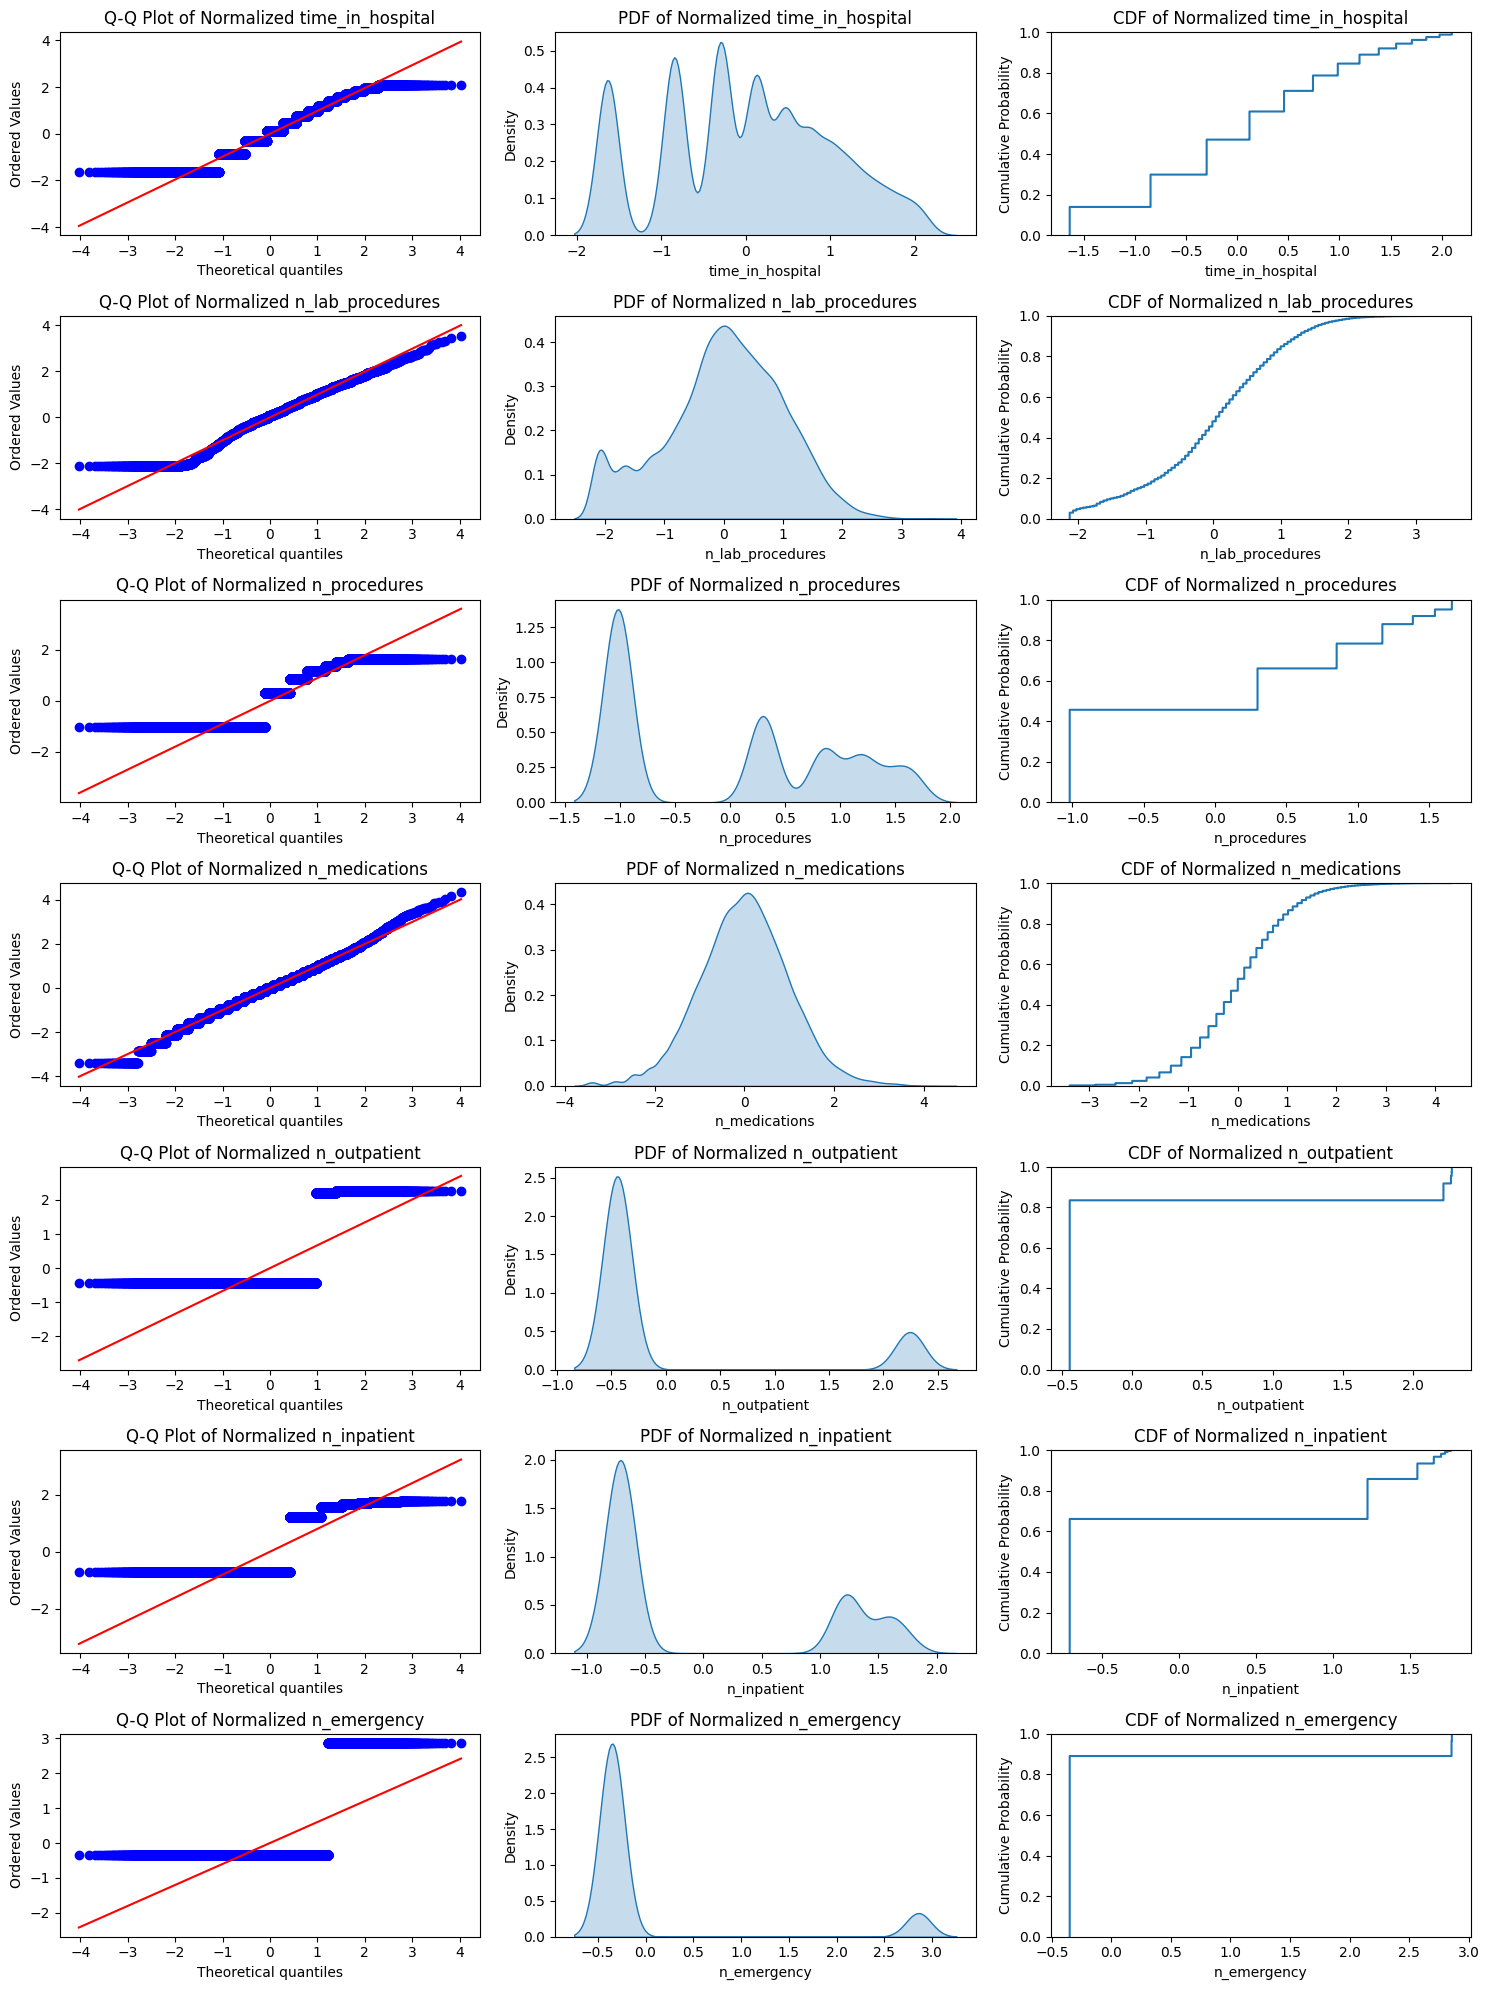

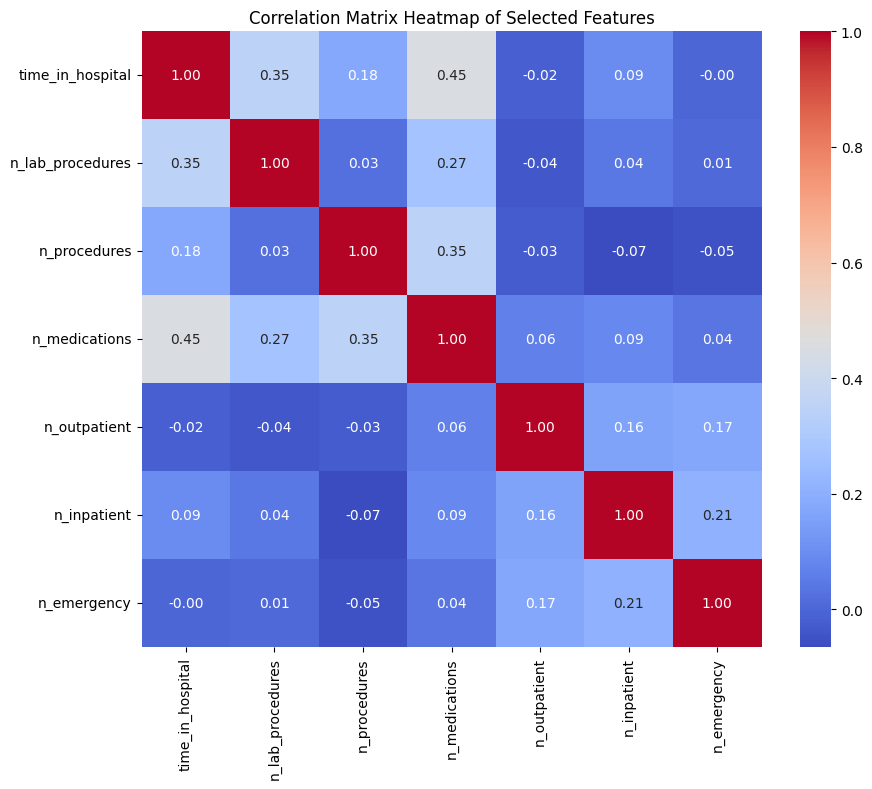

Performance Metrics for Multiple Linear Regression:
RMSE: 0.9703
R^2: 0.0585
MAE: 0.9398


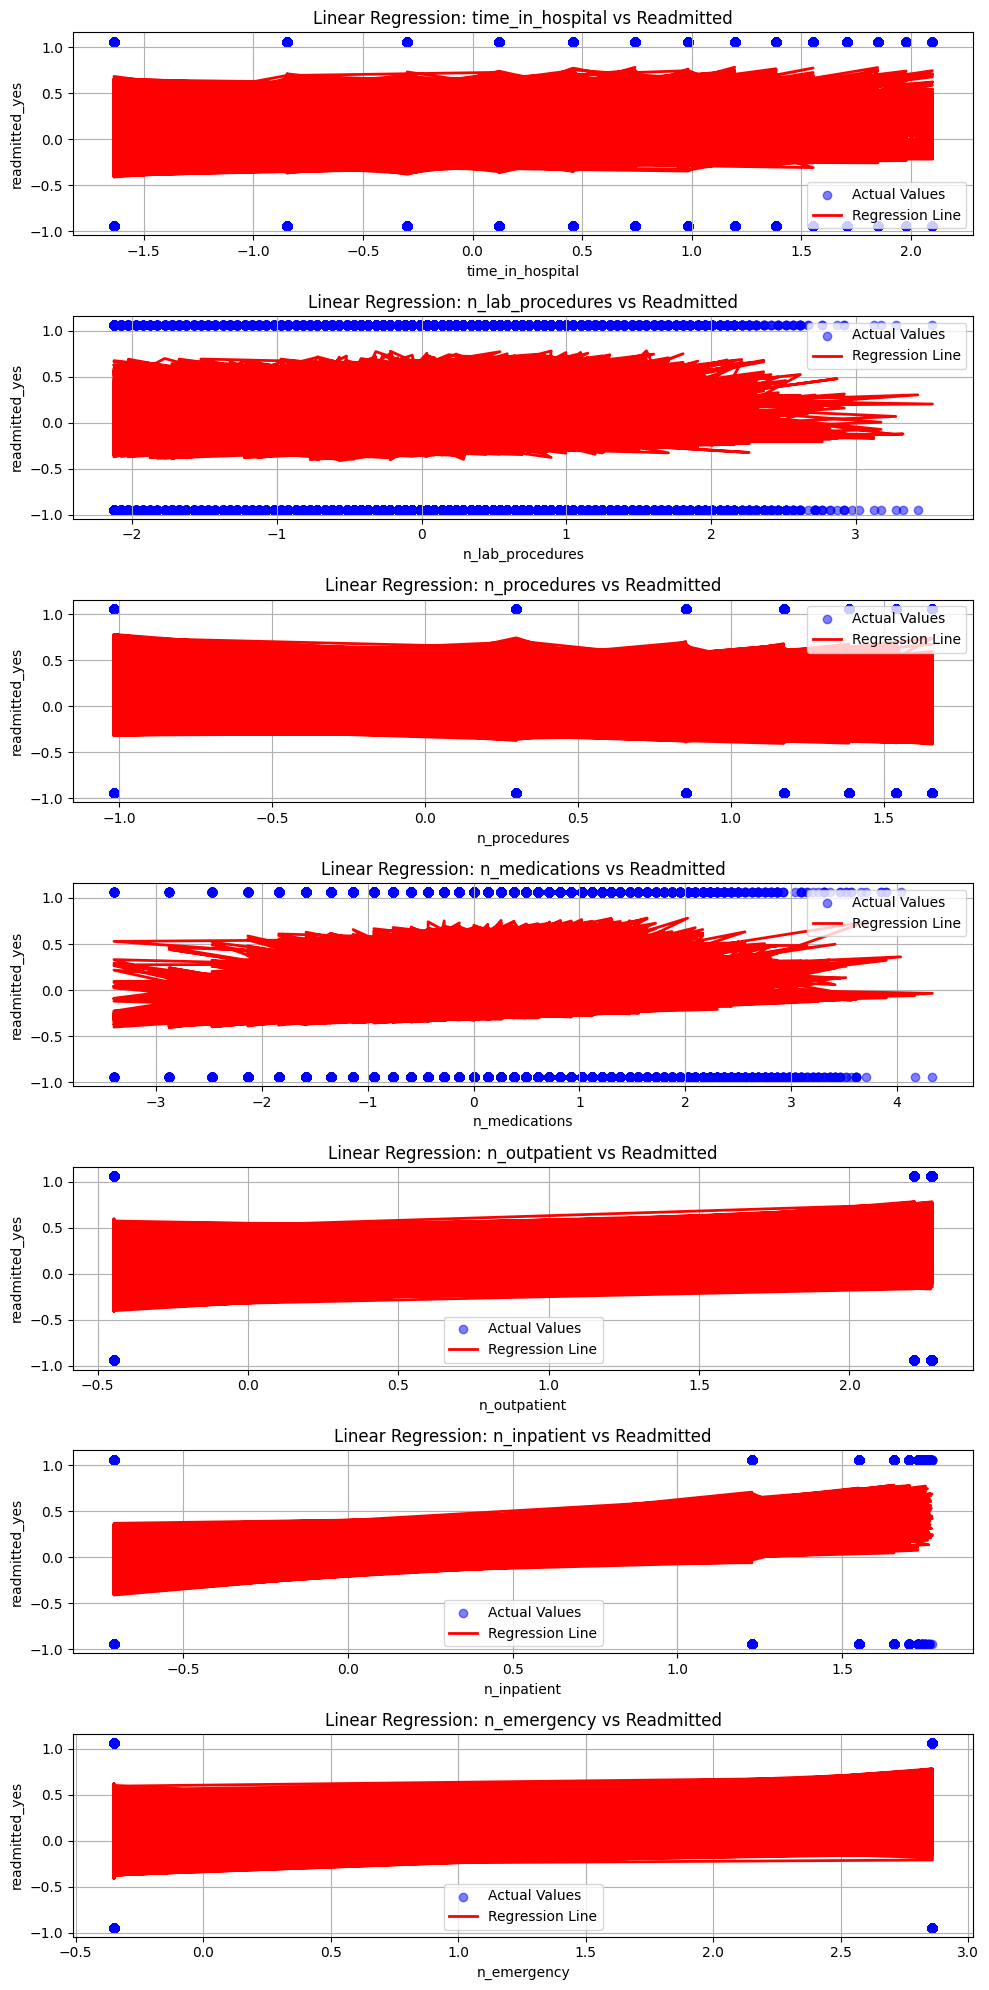

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv("hospital_readmissions.csv")

numericColumnsMean = data.select_dtypes(include=[float, int]).mean()
data = data.fillna(numericColumnsMean)

categoricalCols = data.select_dtypes(include=['object', 'category']).columns
data = pd.get_dummies(data, columns=categoricalCols, drop_first=True)

descriptiveAnalysis = data.describe()
print("Descriptive Analysis Summary:")
print(descriptiveAnalysis)

#Normalizing the data
scaler = PowerTransformer(method='yeo-johnson')
normalizedData = scaler.fit_transform(data)
normalizedData = pd.DataFrame(normalizedData, columns=data.columns)

#Selecting columns for normality analysis and regression
selected_columns = [
    'time_in_hospital', 
    'n_lab_procedures', 
    'n_procedures', 
    'n_medications', 
    'n_outpatient', 
    'n_inpatient', 
    'n_emergency'
]

#Performing normality analysis using combined plots
fig, axes = plt.subplots(len(selected_columns), 3, figsize=(15, 20))

for i, col in enumerate(selected_columns):
   
    stats.probplot(normalizedData[col], dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f'Q-Q Plot of Normalized {col}')
    
    sns.kdeplot(normalizedData[col], ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f'PDF of Normalized {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')

    sns.ecdfplot(normalizedData[col], ax=axes[i, 2])
    axes[i, 2].set_title(f'CDF of Normalized {col}')
    axes[i, 2].set_xlabel(col)
    axes[i, 2].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(normalizedData[selected_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()

target = 'readmitted_yes'

#Training multiple linear regression model with selected features
X = normalizedData[selected_columns]
y = normalizedData[target]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print('Performance Metrics for Multiple Linear Regression:')
print(f'RMSE: {rmse:.4f}')
print(f'R^2: {r2:.4f}')
print(f'MAE: {mae:.4f}')

#Plotting the regression line for each selected feature
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, 20))

for i, feature in enumerate(selected_columns):
    axes[i].scatter(X[feature], y, alpha=0.5, color='blue', label='Actual Values')
    axes[i].plot(X[feature], y_pred, color='red', linestyle='-', linewidth=2, label='Regression Line')
    axes[i].set_title(f'Linear Regression: {feature} vs Readmitted')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('readmitted_yes')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
